In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [104]:
#import data
dataset = pd.read_csv("Preprocessed_Dataset.csv",index_col="id")
featureNames = dataset.columns
dataset = np.array(dataset.values)
X = dataset[:,:-1]
Y = dataset[:,-1]
trainX,testX=X[:4000,:],X[4000:,:]
trainY,testY=Y[:4000],Y[4000:]

In [105]:
RFclf = RandomForestClassifier(max_depth=15,max_features="log2") #TODO: add paramters
RFclf.fit(trainX,trainY)
RFpredY=RFclf.predict(testX)
RFpredTrainY=RFclf.predict(trainX)
print("training set score:",accuracy_score(trainY,RFpredTrainY))
print("testing set score:",accuracy_score(testY,RFpredY))

training set score: 0.97525
testing set score: 0.7841726618705036


In [106]:
GBDTclf = GradientBoostingClassifier(max_depth=15,max_features="log2")
GBDTclf.fit(trainX,trainY)
GBDTpredY=GBDTclf.predict(testX)
GBDTpredTrainY=GBDTclf.predict(trainX)
print("training set score:",accuracy_score(trainY,GBDTpredTrainY))
print("testing set score:",accuracy_score(testY,GBDTpredY))

training set score: 1.0
testing set score: 0.7889688249400479


In [107]:
LogiClf = LogisticRegression(max_iter=500,solver="liblinear")
LogiClf.fit(trainX,trainY)
LogipredY=LogiClf.predict(testX)
LogipredTrainY=LogiClf.predict(trainX)
print("training set score:",accuracy_score(trainY,LogipredTrainY))
print("testing set score:",accuracy_score(testY,LogipredY))

training set score: 0.7925
testing set score: 0.7697841726618705


In [108]:
featureNames=np.array(featureNames)
featureNames = np.concatenate((np.array(["home_ownership"]),featureNames[4:-1]))
featureImportance = RFclf.feature_importances_
homeOwnershipTotal = featureImportance[0]+featureImportance[1]+featureImportance[2]+featureImportance[3]
newfeatureImportance = np.concatenate((np.array([homeOwnershipTotal]),featureImportance[4:]))

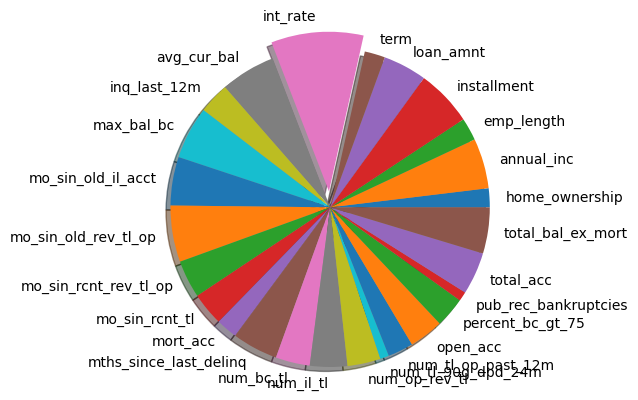

In [109]:
fig,axi = plt.subplots()
explode = [0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
axi.pie(newfeatureImportance,labels=featureNames, explode=explode,shadow=True)
axi.axis('equal')
plt.show()

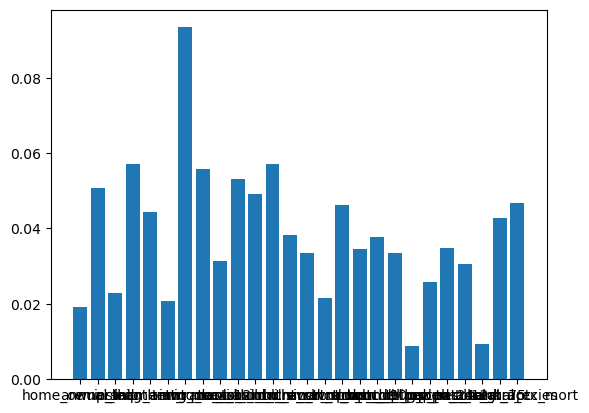

In [114]:
fig,axi = plt.subplots()
explode = [0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
axi.bar(featureNames,newfeatureImportance)
plt.show()

In [117]:
pd.DataFrame(newfeatureImportance,index=featureNames).to_excel("featureImportance.xlsx")